# Part 4 - Modeling

In [1]:
# Load packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset

df = pd.read_csv('Part_3.csv')
pd.set_option("display.max_columns", None)
display(df.head())

,loan_status,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_score,fico_class,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verif_stat,year_issue,month_issue,year_ecl,month_ecl,geo_loc,geo_loc_ns,geo_loc_we
0,1,5000.0,36,10.65,162.87,2,10.0,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,76.0,0.0,737,1,0,0,0,0,1,3,2011,12,3,1,4,2,2
1,0,2500.0,60,15.27,59.83,3,0.0,30000.0,3,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,76.0,0.0,742,2,0,0,0,0,1,2,2011,12,2,4,3,2,1
2,1,2400.0,36,15.96,84.33,3,10.0,12252.0,4,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,76.0,0.0,737,1,0,0,0,0,1,1,2011,12,1,11,1,1,1
3,1,10000.0,36,13.49,339.31,3,10.0,49200.0,4,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,76.0,0.0,692,1,0,0,0,0,1,2,2011,12,2,2,4,2,2
4,1,3000.0,60,12.69,67.79,2,1.0,80000.0,4,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,76.0,0.0,697,1,0,0,0,0,1,2,2011,12,2,1,2,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_status              39786 non-null  int64  
 1   loan_amnt                39786 non-null  float64
 2   term                     39786 non-null  int64  
 3   int_rate                 39786 non-null  float64
 4   installment              39786 non-null  float64
 5   sub_grade                39786 non-null  int64  
 6   emp_length               39786 non-null  float64
 7   annual_inc               39786 non-null  float64
 8   purpose                  39786 non-null  int64  
 9   dti                      39786 non-null  float64
 10  delinq_2yrs              39786 non-null  float64
 11  inq_last_6mths           39786 non-null  float64
 12  open_acc                 39786 non-null  float64
 13  pub_rec                  39786 non-null  float64
 14  revol_bal             

In [4]:
round(100*(df.isnull().sum()/len(df.index)), 2)

loan_status                0.0
loan_amnt                  0.0
term                       0.0
int_rate                   0.0
installment                0.0
sub_grade                  0.0
emp_length                 0.0
annual_inc                 0.0
purpose                    0.0
dti                        0.0
delinq_2yrs                0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
pub_rec_bankruptcies       0.0
fico_score                 0.0
fico_class                 0.0
home_ownership_MORTGAGE    0.0
home_ownership_NONE        0.0
home_ownership_OTHER       0.0
home_ownership_OWN         0.0
home_ownership_RENT        0.0
verif_stat                 0.0
year_issue                 0.0
month_issue                0.0
year_ecl                   0.0
month_ecl                  0.0
geo_loc                    0.0
geo_loc_ns                 0.0
geo_loc_

In [5]:
df.columns

Index(['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_score',
       'fico_class', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verif_stat', 'year_issue', 'month_issue', 'year_ecl', 'month_ecl',
       'geo_loc', 'geo_loc_ns', 'geo_loc_we'],
      dtype='object')

In [6]:
df.shape

(39786, 33)

In [7]:
# z-score

from scipy import stats

z = np.abs(stats.zscore(df[['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_score',
       'fico_class', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verif_stat', 'year_issue', 'month_issue',
       'year_ecl', 'month_ecl', 'geo_loc', 'geo_loc_ns', 'geo_loc_we']]))
print(z)
print()

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outliers - the index numbers and the corresponding column indices:')
print(np.where(z > 3))

       loan_status  loan_amnt      term  int_rate  installment  sub_grade  \
0         0.407673   0.834805  0.606139  0.369659     0.774762   0.417449   
1         2.452943   1.169726  1.649787  0.869805     1.267963   0.302911   
2         0.407673   1.183123  0.606139  1.054919     1.150694   0.302911   
3         0.407673   0.164963  0.606139  0.392262     0.069770   0.302911   
4         0.407673   1.102742  1.649787  0.177637     1.229863   0.417449   
...            ...        ...       ...       ...          ...        ...   
39781     0.407673   1.169726  0.606139  1.061827     1.178982   1.137809   
39782     0.407673   0.365916  0.606139  0.468923     0.236232   0.302911   
39783     0.407673   0.834805  0.606139  1.061827     0.803624   1.137809   
39784     0.407673   0.834805  0.606139  1.233527     0.810612   1.137809   
39785     0.407673   0.499884  0.606139  0.462016     0.331722   1.743631   

       emp_length  annual_inc   purpose       dti  delinq_2yrs  \
0        

In [8]:
df = df[(z<3).all(axis=1)]

In [9]:
# Removing outliers

df_outliers_removed = df[(z<3).all(axis=1)]

C:\Users\barte\AppData\Local\Temp\ipykernel_18108\3821966659.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outliers_removed = df[(z<3).all(axis=1)]


In [10]:
# Data Frame shape after deleting outliers

df_outliers_removed.shape

(29802, 33)

### Clustering: KMeans
#### Justifying methods: Silhouette score, Elbow-curve method

In [11]:
# Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [12]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_outliers_removed)

KMeans(n_clusters=5)

In [13]:
kmeans.labels_

array([2, 2, 1, ..., 3, 2, 3])

In [14]:
# Silhouette score

range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(df_outliers_removed)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_outliers_removed, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5438175040412306
For n_clusters=3, the silhouette score is 0.4467772839418096
For n_clusters=4, the silhouette score is 0.3949810767059705
For n_clusters=5, the silhouette score is 0.3539550216702153


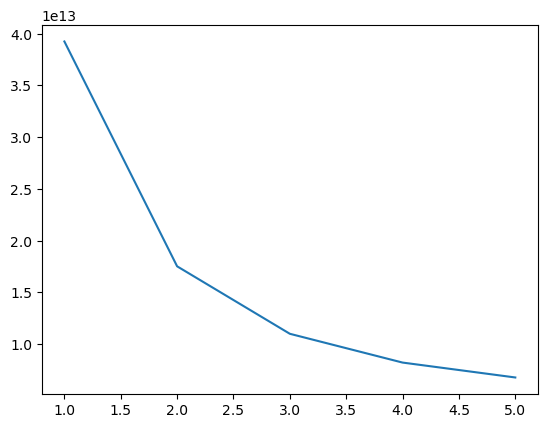

In [15]:
# Elbow-curve method

ssd = [] # Sum of squared distances
range_n_clusters = [1, 2, 3, 4, 5]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(df_outliers_removed)
    
    ssd.append(kmeans.inertia_) #Sum of squared distances
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)

In [16]:
# n_clusters = 3

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_outliers_removed)

KMeans(n_clusters=3, random_state=42)

In [17]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [18]:
df_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

In [19]:
df_outliers_removed['K-Means_Cluster_ID'].value_counts()

0    16205
1    10978
2     2619
Name: K-Means_Cluster_ID, dtype: int64

In [20]:
df_outliers_removed.groupby('K-Means_Cluster_ID')['loan_status'].value_counts()

K-Means_Cluster_ID  loan_status
0                   1              13691
                    0               2514
1                   1               9717
                    0               1261
2                   1               2359
                    0                260
Name: loan_status, dtype: int64

In [21]:
df_outliers_removed.groupby('K-Means_Cluster_ID')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
K-Means_Cluster_ID,,,,,,,,
0,16205.0,8601.507251,5295.819811,500.0,4800.0,7500.0,12000.0,32000.0
1,10978.0,12941.979413,6975.593849,1000.0,7200.0,12000.0,18000.0,33600.0
2,2619.0,15350.792287,7589.547860,1000.0,9600.0,15000.0,21000.0,33600.0


Regardless of the separation of 2 or 3 clusters, there is no clear division into the loan_status column: Fully Paid and Charged Off, n_clusters = 2 has been selected.

In [22]:
# n_clusters = 2

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_outliers_removed)

KMeans(n_clusters=2, random_state=42)

In [23]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
df_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

In [25]:
df_outliers_removed['K-Means_Cluster_ID'].value_counts()

0    22582
1     7220
Name: K-Means_Cluster_ID, dtype: int64

In [26]:
df_outliers_removed.groupby('K-Means_Cluster_ID')['loan_status'].value_counts()

K-Means_Cluster_ID  loan_status
0                   1              19273
                    0               3309
1                   1               6494
                    0                726
Name: loan_status, dtype: int64

In [27]:
df_outliers_removed.groupby('K-Means_Cluster_ID')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
K-Means_Cluster_ID,,,,,,,,
0,22582.0,9638.458728,5972.755382,500.0,5000.0,8375.0,13000.0,33425.0
1,7220.0,14406.166898,7372.722951,1000.0,8100.0,14000.0,20000.0,33600.0


## Boxplots for selected variables

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='installment'>

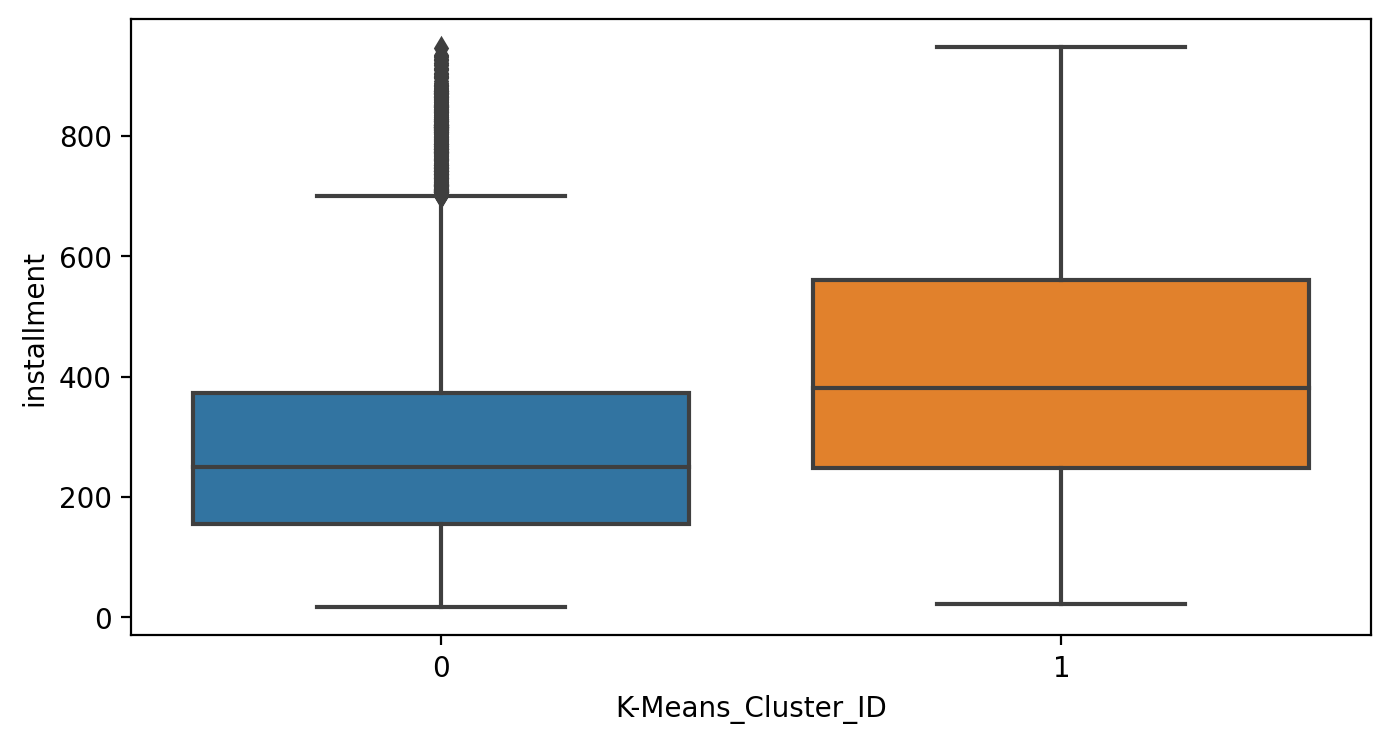

In [28]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x=df_outliers_removed['K-Means_Cluster_ID'], y='installment', data=df_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='loan_amnt'>

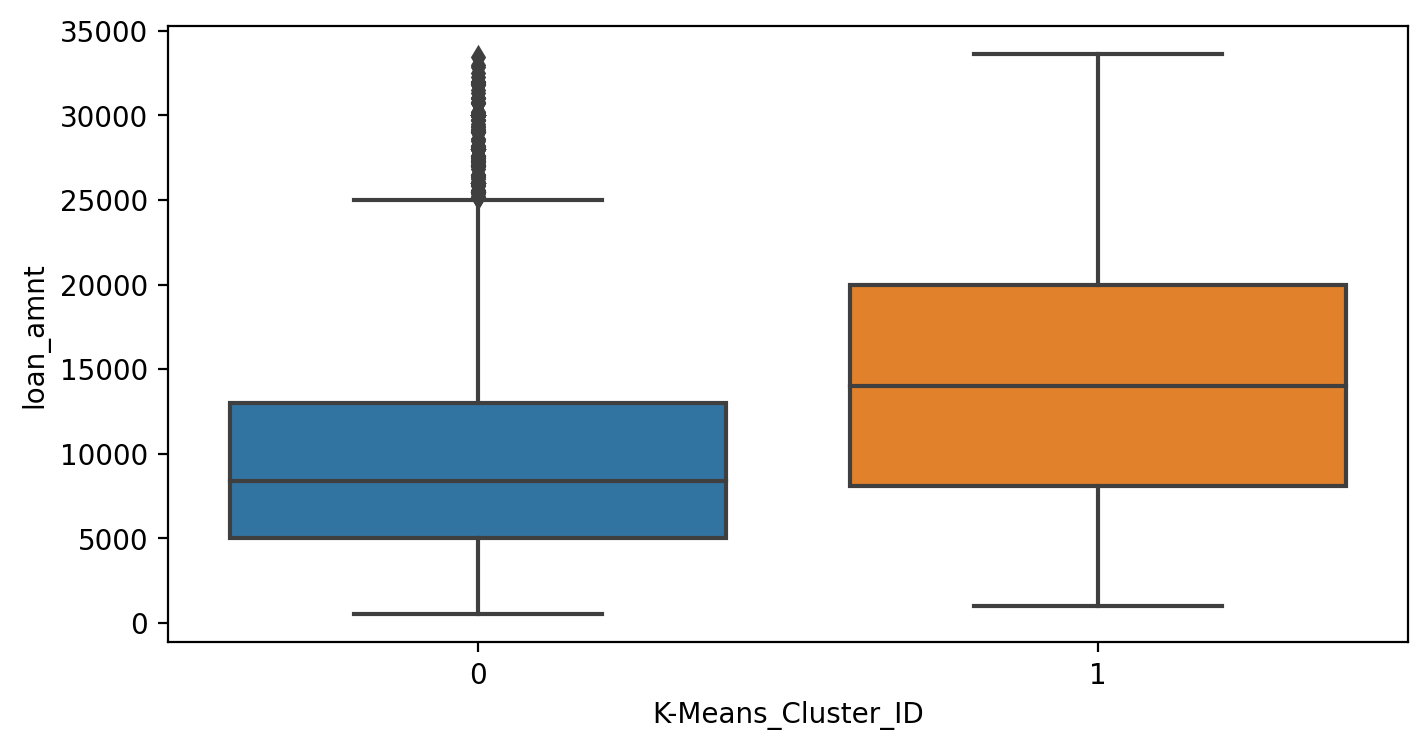

In [29]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x=df_outliers_removed['K-Means_Cluster_ID'], y='loan_amnt', data=df_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='annual_inc'>

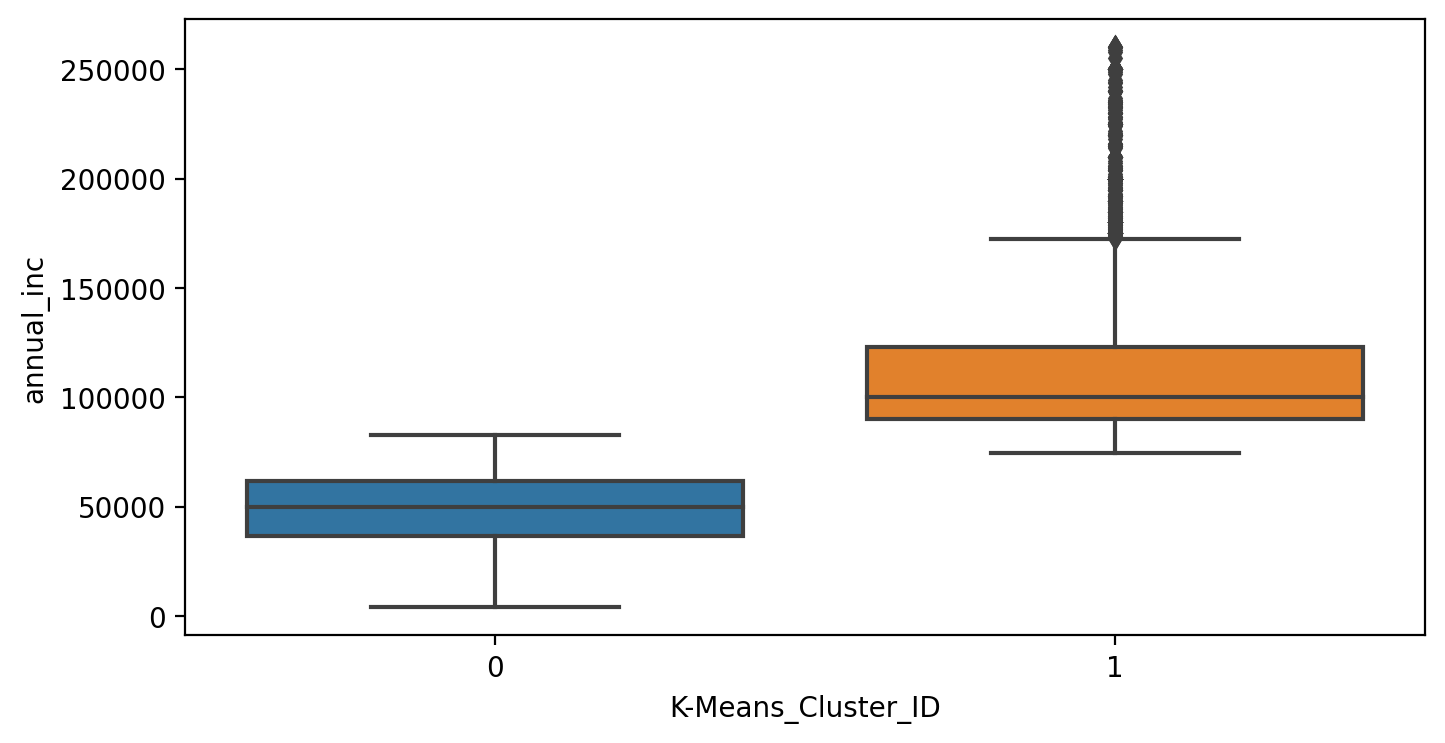

In [30]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x=df_outliers_removed['K-Means_Cluster_ID'], y='annual_inc', data=df_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='fico_score'>

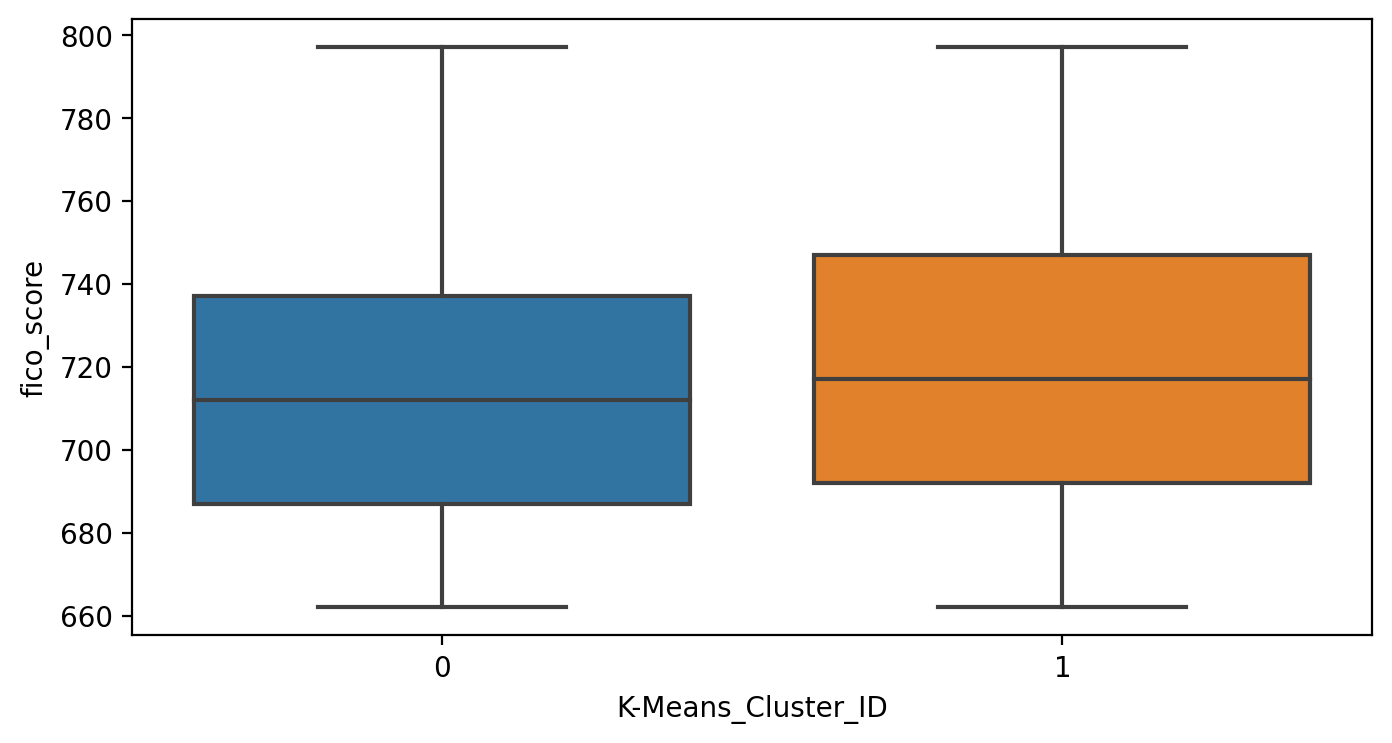

In [31]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x=df_outliers_removed['K-Means_Cluster_ID'], y='fico_score', data=df_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='emp_length'>

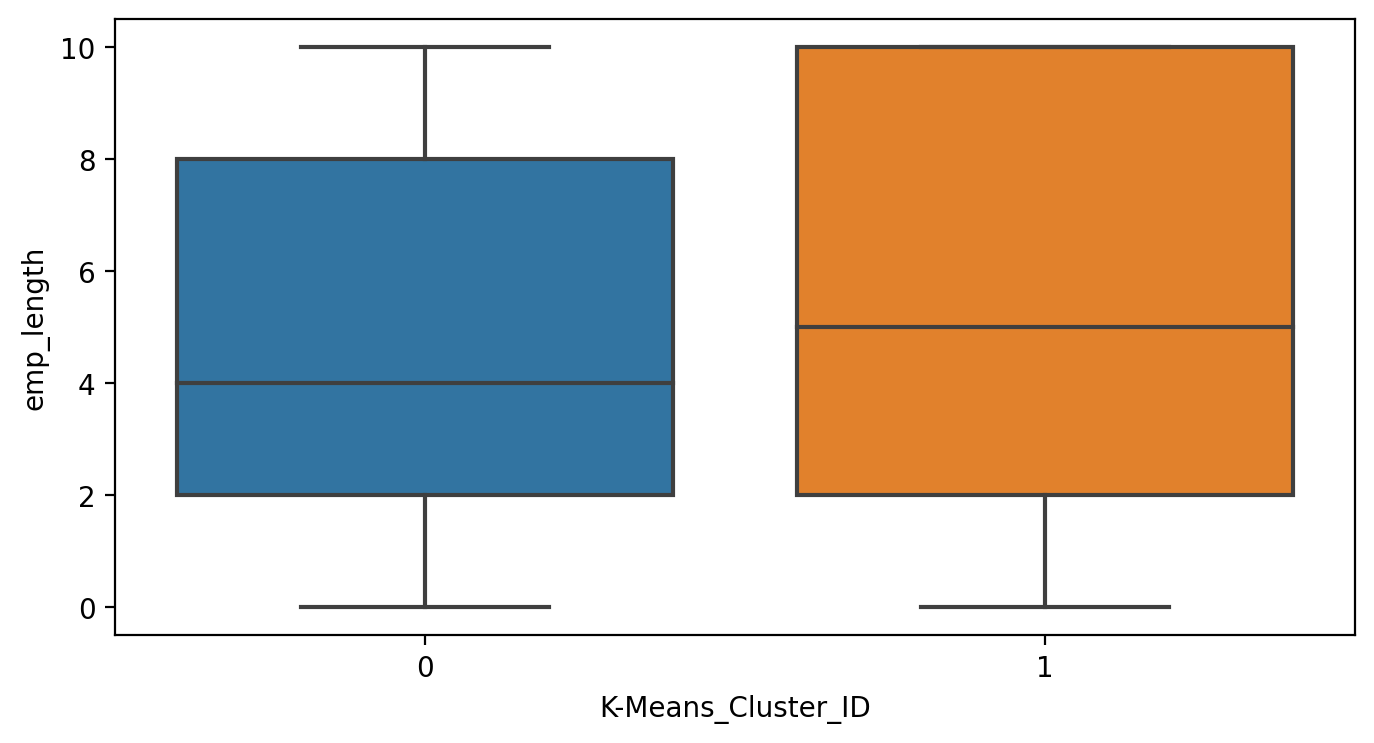

In [32]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x=df_outliers_removed['K-Means_Cluster_ID'], y='emp_length', data=df_outliers_removed)

Most selected clusters are poorly separated.

### Decision Tree

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [35]:
print(X.shape)
print(y.shape)

(29802, 32)
(29802,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
# Checking the size of the data split

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20861, 32)
(8941, 32)
(20861,)
(8941,)


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree = DecisionTreeClassifier()

In [40]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True, zero_division=1)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [42]:
dt_prediction = dtree.predict(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score

In [44]:
print(classification_report(y_test,dt_prediction))

dtree_pr= evaluate(dt_prediction,y_test)
dtree_pr

              precision    recall  f1-score   support

           0       0.17      0.19      0.18      1223
           1       0.87      0.86      0.86      7718

    accuracy                           0.77      8941
   macro avg       0.52      0.52      0.52      8941
weighted avg       0.77      0.77      0.77      8941



{'f1-score': 0.86, 'accuracy': 0.77}

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
rf_prediction = rf.predict(X_test)

In [47]:
print(classification_report(y_test,rf_prediction))
rf_pr = evaluate(rf_prediction,y_test)
print(rf_pr)

              precision    recall  f1-score   support

           0       0.59      0.01      0.02      1223
           1       0.86      1.00      0.93      7718

    accuracy                           0.86      8941
   macro avg       0.73      0.50      0.47      8941
weighted avg       0.83      0.86      0.80      8941

{'f1-score': 0.93, 'accuracy': 0.86}


### Random Forest using Randomized Search

In [48]:
# Randomized Search 

from sklearn.model_selection import RandomizedSearchCV

In [49]:
param_rand = {'n_estimators': np.arange(100,800,100),
              'max_features' : ['auto', 'sqrt'],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2, 5, 10],
              'max_depth' : np.arange(10,100,10),
              'max_leaf_nodes': np.arange(2,5,10),
             }

In [50]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_rand, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [51]:
rf_randomized = RandomForestClassifier(n_estimators= 600,min_samples_split= 5, min_samples_leaf = 1,
                                       max_leaf_nodes= 2,max_features= 'auto',max_depth= 70)
rf_randomized.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, max_leaf_nodes=2, min_samples_split=5,
                       n_estimators=600)

In [52]:
rf_rand_prediction = rf_randomized.predict(X_test)

In [53]:
print(classification_report(y_test,rf_rand_prediction))
rf_rand_pr = evaluate(rf_rand_prediction,y_test)
rf_rand_pr

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1223
           1       0.86      1.00      0.93      7718

    accuracy                           0.86      8941
   macro avg       0.43      0.50      0.46      8941
weighted avg       0.75      0.86      0.80      8941



C:\Users\barte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'f1-score': 0.93, 'accuracy': 0.86}

### Support Vector Machine (SVM)

In [54]:
from sklearn.svm import SVC

In [55]:
model = SVC()

In [56]:
model.fit(X_train,y_train)

SVC()

In [57]:
svm_prediction = model.predict(X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(y_test,svm_prediction))
svm_pr = evaluate(svm_prediction,y_test)
svm_pr

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1223
           1       0.86      1.00      0.93      7718

    accuracy                           0.86      8941
   macro avg       0.43      0.50      0.46      8941
weighted avg       0.75      0.86      0.80      8941



C:\Users\barte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\barte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'f1-score': 0.93, 'accuracy': 0.86}

### K-Nearest Neighbors (KNN)

In [60]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df.drop('loan_status',axis=1))
scaled_data = scale.transform(df.drop('loan_status',axis=1))
df_scaled = pd.DataFrame(scaled_data,columns=df.drop('loan_status',axis=1).columns)
df_scaled.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_score,fico_class,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verif_stat,year_issue,month_issue,year_ecl,month_ecl,geo_loc,geo_loc_ns,geo_loc_we
0,-0.869756,-0.594686,-0.319322,-0.799359,-0.369483,1.471669,-1.185502,-0.707187,2.150037,-0.303263,0.177791,-1.532491,0.0,0.128583,1.216816,0.025514,0.0,0.605951,-0.354507,-0.91254,0.0,0.0,0.0,0.91254,1.309869,0.777119,1.418962,1.774669,-1.674265,1.303934,1.085958,1.274586
1,-1.260084,-0.594686,1.160924,-1.218034,0.395458,1.471669,-1.531256,1.668597,-0.743500,-0.303263,1.188382,-1.780874,0.0,-0.856441,1.765896,0.025514,0.0,0.605951,-0.354507,-0.91254,0.0,0.0,0.0,0.91254,-1.035594,0.777119,1.418962,-1.022712,1.154717,-0.995420,-0.920846,-0.784568
2,-0.119127,-0.594686,0.472373,0.141193,0.395458,1.471669,-0.443845,1.668597,0.980700,-0.303263,0.177791,0.206195,0.0,-0.613041,-1.109356,0.025514,0.0,-0.731015,-0.354507,-0.91254,0.0,0.0,0.0,0.91254,0.137137,0.777119,1.418962,0.375978,-1.391367,1.303934,1.085958,1.274586
3,-1.170008,1.681559,0.249360,-1.306204,-0.369483,-1.090984,0.462626,1.668597,0.665819,-0.303263,-0.832800,1.448113,0.0,1.430801,0.111235,0.025514,0.0,-0.582463,-0.354507,-0.91254,0.0,0.0,0.0,0.91254,0.137137,0.777119,1.418962,0.375978,-1.674265,-0.228968,-0.920846,1.274586
4,-0.869756,-0.594686,-1.085928,-0.833529,-1.134423,-0.521506,-0.832332,1.668597,-0.364420,-0.303263,2.198974,-0.042189,0.0,-0.395161,-0.838525,0.025514,0.0,0.457399,-0.354507,-0.91254,0.0,0.0,0.0,0.91254,0.137137,0.777119,1.418962,-1.022712,1.154717,1.303934,1.085958,1.274586


In [61]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(scaled_data,df['loan_status'],
                                                    test_size=0.30, random_state = 42)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [63]:
knn.fit(X_scaled_train,y_scaled_train)

KNeighborsClassifier(n_neighbors=2)

In [64]:
knn_prediction = knn.predict(X_scaled_test)

C:\Users\barte\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [65]:
print(classification_report(knn_prediction,y_scaled_test))
knn1_pr = evaluate(knn_prediction,y_scaled_test)
knn1_pr

              precision    recall  f1-score   support

           0       0.30      0.18      0.23      2000
           1       0.79      0.88      0.83      6941

    accuracy                           0.72      8941
   macro avg       0.55      0.53      0.53      8941
weighted avg       0.68      0.72      0.70      8941



{'f1-score': 0.83, 'accuracy': 0.72}

In [66]:
prediction_data={'Model':['Decision Tree',
                          'Random Forest',
                          'Random Forest using Randomized Search',
                          'SVM',
                          'KNN'
                         ],
                   'F1-score':[dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              rf_rand_pr['f1-score'],
                              svm_pr['f1-score'],
                              knn1_pr['f1-score']],
                 
                   'Accuracy':[dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              rf_rand_pr['accuracy'],
                              svm_pr['accuracy'],
                              knn1_pr['accuracy']]
                    }
 
# Create DataFrame
prediction_table = pd.DataFrame(prediction_data)
prediction_table

,Model,F1-score,Accuracy
0,Decision Tree,0.86,0.77
1,Random Forest,0.93,0.86
2,Random Forest using Randomized Search,0.93,0.86
3,SVM,0.93,0.86
4,KNN,0.83,0.72


The three models: Random Forest, Random Forest using Randomized Search and SVM have the same high accuracy and f1_score.

# Prediction with the use of the Random Forest Classifier

In [67]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

In [68]:
# Prediction of first 20 values

print('Predicted values:', rf.predict(X[:20]))
print('Real values:') 
print(y_test[:20])

Predicted values: [1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1]
Real values:
20997    1
31634    1
6752     1
37002    1
32877    1
12440    1
34024    1
34800    1
29966    1
30700    1
11424    1
22043    1
16176    1
2821     1
21136    1
32279    1
16999    1
19005    1
23849    1
36614    1
Name: loan_status, dtype: int64


In [69]:
y_pred = rf.predict(X_test)
y_test == y_pred
print('Well-predicted values in testing:', (y_test == y_pred).sum())
print('All values in testing part:', y_test.shape[0])
print()
print('Accuracy = Well-predicted values in testing part/ All values in testing part:', ((y_test == y_pred).sum() / y_test.shape[0]).round(4))
print()
print('Accuracy with sklearn:', rf.score(X_test, y_test).round(4))

Well-predicted values in testing: 7717
All values in testing part: 8941

Accuracy = Well-predicted values in testing part/ All values in testing part: 0.8631

Accuracy with sklearn: 0.8631


Text(0.5, 1.0, 'Features Correlating with loan_status')

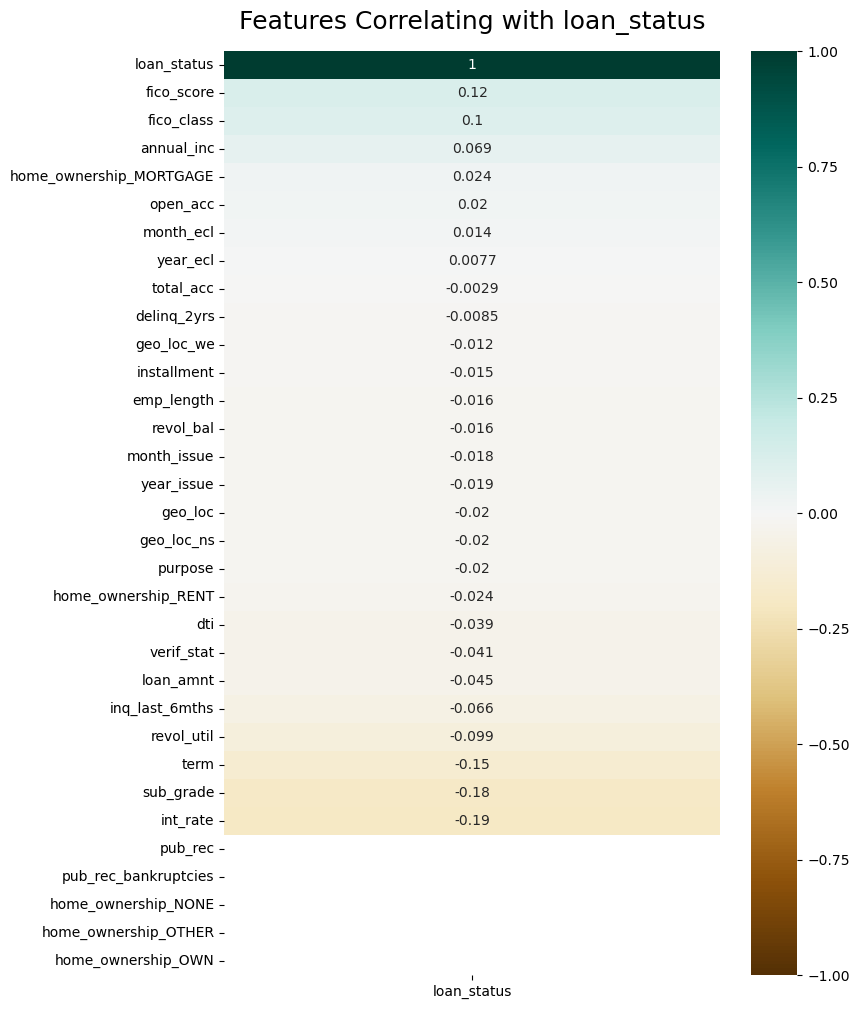

In [70]:
# The heatmap with the best correlation with loan_status

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['loan_status']].sort_values(by='loan_status', ascending = False), 
                      vmin = -1, vmax = 1, annot = True, cmap='BrBG')
heatmap.set_title('Features Correlating with loan_status', fontdict={'fontsize': 18}, pad = 16)

In [71]:
# Selecting the best correlated variables from loan_status

new_X = df[['int_rate', 'sub_grade', 'term', 'fico_score', 'loan_amnt']].values
new_y = df['loan_status'].values

example_df = df[['loan_status', 'int_rate', 'sub_grade', 'term', 'fico_score', 'loan_amnt']]
example_df

,loan_status,int_rate,sub_grade,term,fico_score,loan_amnt
0,1,10.65,2,36,737,5000.0
2,1,15.96,3,36,737,2400.0
3,1,13.49,3,36,692,10000.0
4,1,12.69,2,60,697,3000.0
5,1,7.90,1,36,732,5000.0
...,...,...,...,...,...,...
39530,1,9.96,2,36,707,12000.0
39531,1,9.64,2,36,712,10000.0
39532,1,12.80,4,36,667,16000.0
39534,1,14.38,5,36,672,20000.0


In [72]:
example_df.loan_status.value_counts()

1    25767
0     4035
Name: loan_status, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, random_state = 42)
model = rf.fit(X_train, y_train)

In [74]:
y_pred_new = model.predict(X_test)

In [75]:
print(y_test[:20])
print(y_pred_new[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [76]:
# # Enter the appropriate values to predict the probability that the loan will be repaid:

# int_rate = float(input('Interest Rate of the loan (0 - 100): '))
# sub_grade = int(input('LC assigned loan subgrade (1 - 7): '))
# term = int(input('The number of payments on the loan (36 or 60): '))
# fico_score = int(input('FICO score (500 - 850): '))
# loan_amnt = float(input('The listed amount of the loan applied for by the borrower (500 - 35000): '))

In [77]:
# # Predicting whether the customer will pay off the loan (0 - No or 1 - Yes)

# print(rf.predict([[int_rate, sub_grade, term, fico_score, loan_amnt]]))

# Conclusion

The project, which concerns predicting whether Lending Club clients will pay off their loans, has been divided into 4 parts: Data Processing, Exploratory Data Analysis, Feature Engineering, and Machine Learning. After a thorough cleaning of the data and the introduction of new ones, machine learning models were implemented. Five of them were tested: Decision Tree, Random Forest, Random Forest using Randomized Search, Support Vector Machine, and K-Nearest Neighbors (KNN). The three models gave the same accuracy and f1-score results (Random Forest using Randomized Search, Support Vector Machine). Finally, the Random Forest model was used to predict whether borrowers would be able to repay their loans. Based on the heatmap, the dependent variables best correlated with the target (loan_status) were selected and the Random Forest model was built only with them. By manually entering the 8 variables mentioned above, the model predicts whether the new borrower will pay back the loan.